# Employment & Education Data Analysis (Canada)

**Tools:** Python, Excel, Power BI  
**Author:** Lesley Wanjiku Kamamo  
**Last updated:** 2025-10-22

This notebook demonstrates an end-to-end workflow:
1. **Find & document sources** (Statistics Canada tables)
2. **Ingest data** (sample CSV)
3. **Clean & reshape** to a tidy schema
4. **EDA & visualization**
5. **Correlation analysis** between education and employment rate
6. **Exports**: cleaned CSV + Excel to feed **Power BI**

## Data sources (Statistics Canada)

- **14-10-0118-01**: Labour force characteristics by *educational degree*, **annual**.  
  WDS info: https://www.statcan.gc.ca/en/developers/wds  
  Table page: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410011801

In [1]:
# importing the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import requests
import xlsxwriter

pd.set_option("display.max_columns", 50)


In [31]:
raw_df = pd.read_csv(r"../data/14100118.csv")
raw_df.head()

,REF_DATE,GEO,DGUID,Labour force characteristics,Educational degree,Gender,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1990,Canada,2021A000011124,Population,"Total, all education levels",Total - Gender,15 years and over,Persons in thousands,428,thousands,3,v55009060,1.1.1.1.1,21214.7,NaN,NaN,NaN,1
1,1990,Canada,2021A000011124,Population,"Total, all education levels",Total - Gender,15 to 24 years,Persons in thousands,428,thousands,3,v55009061,1.1.1.1.2,3924.9,NaN,NaN,NaN,1
2,1990,Canada,2021A000011124,Population,"Total, all education levels",Total - Gender,25 years and over,Persons in thousands,428,thousands,3,v55009062,1.1.1.1.3,17289.8,NaN,NaN,NaN,1
3,1990,Canada,2021A000011124,Population,"Total, all education levels",Total - Gender,25 to 54 years,Persons in thousands,428,thousands,3,v55009063,1.1.1.1.4,12029.9,NaN,NaN,NaN,1
4,1990,Canada,2021A000011124,Population,"Total, all education levels",Total - Gender,55 years and over,Persons in thousands,428,thousands,3,v55009064,1.1.1.1.5,5259.9,NaN,NaN,NaN,1


## Data Exploration

In [34]:
print("Displaying the DataFrame info:", raw_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808500 entries, 0 to 808499
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   REF_DATE                      808500 non-null  int64  
 1   GEO                           808500 non-null  object 
 2   DGUID                         808500 non-null  object 
 3   Labour force characteristics  808500 non-null  object 
 4   Educational degree            808500 non-null  object 
 5   Gender                        808500 non-null  object 
 6   Age group                     808500 non-null  object 
 7   UOM                           808500 non-null  object 
 8   UOM_ID                        808500 non-null  int64  
 9   SCALAR_FACTOR                 808500 non-null  object 
 10  SCALAR_ID                     808500 non-null  int64  
 11  VECTOR                        808500 non-null  object 
 12  COORDINATE                    808500 non-nul

In [35]:
raw_df.describe(include='all')

,REF_DATE,GEO,DGUID,Labour force characteristics,Educational degree,Gender,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
count,808500.000000,808500,808500,808500,808500,808500,808500,808500,808500.000000,808500,808500.000000,808500,808500,709958.000000,98542,0.0,0.0,808500.0
unique,NaN,11,11,10,10,3,7,2,NaN,2,NaN,23100,23100,NaN,1,NaN,NaN,NaN
top,NaN,Canada,2021A000011124,Population,"Total, all education levels",Total - Gender,15 years and over,Persons in thousands,NaN,thousands,NaN,v55009060,1.1.1.1.1,NaN,x,NaN,NaN,NaN
freq,NaN,73500,73500,80850,80850,269500,115500,565950,NaN,565950,NaN,35,35,NaN,98542,NaN,NaN,NaN
mean,2007.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371.300000,NaN,2.100000,NaN,NaN,148.251799,NaN,NaN,NaN,1.0
std,10.099511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.610734,NaN,1.374774,NaN,NaN,656.758049,NaN,NaN,NaN,0.0
min,1990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.000000,NaN,0.000000,NaN,NaN,0.200000,NaN,NaN,NaN,1.0
25%,1998.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.000000,NaN,0.000000,NaN,NaN,6.000000,NaN,NaN,NaN,1.0
50%,2007.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,428.000000,NaN,3.000000,NaN,NaN,26.100000,NaN,NaN,NaN,1.0
75%,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,428.000000,NaN,3.000000,NaN,NaN,76.700000,NaN,NaN,NaN,1.0


In [36]:
# finding unique values for the categorical columns
for col in raw_df.columns:
    if raw_df[col].dtype == 'object':
        unique_values = raw_df[col].unique()
        print(f"\nUnique values in '{col}' column:\n", unique_values)



Unique values in 'GEO' column:
 ['Canada' 'Newfoundland and Labrador' 'Prince Edward Island' 'Nova Scotia'
 'New Brunswick' 'Quebec' 'Ontario' 'Manitoba' 'Saskatchewan' 'Alberta'
 'British Columbia']

Unique values in 'DGUID' column:
 ['2021A000011124' '2021A000210' '2021A000211' '2021A000212' '2021A000213'
 '2021A000224' '2021A000235' '2021A000246' '2021A000247' '2021A000248'
 '2021A000259']

Unique values in 'Labour force characteristics' column:
 ['Population' 'Labour force' 'Employment' 'Full-time employment'
 'Part-time employment' 'Unemployment' 'Not in labour force'
 'Unemployment rate' 'Participation rate' 'Employment rate']

Unique values in 'Educational degree' column:
 ['Total, all education levels' 'No degree, certificate or diploma'
 'High school graduate' 'High school graduate, some post-secondary'
 'Postsecondary certificate or diploma' 'Without high school graduation'
 'With high school graduation' 'University degree' "Bachelor's degree"
 "Above bachelor's degree"]

Un

`Filter the data according to the specs you want`

- For the data, only get where:

    ref_date >= 2014

    geo is Not 'Canada'

    Labour force characteristics is Not 'Population'

    Educational degree is Not 'Total, all education levels

    Gender is Not 'Total - Gender'
    
    Age group == '15 years and over'

In [37]:
# I only need data from the year 2014 onwards and geo != canada and age group = 15 years and over 
filtered_df = raw_df[(raw_df['REF_DATE'] >= 2014) 
                   & (raw_df['GEO'] != 'Canada') 
                   & (raw_df['Labour force characteristics'] != 'Population')
                   & (raw_df['Educational degree'] != 'Total, all education levels')
                   & (raw_df['Gender'] != 'Total - Gender')
                   & (raw_df['Age group'] == '15 years and over')]


filtered_df.head()

,REF_DATE,GEO,DGUID,Labour force characteristics,Educational degree,Gender,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
556738,2014,Newfoundland and Labrador,2021A000210,Labour force,"No degree, certificate or diploma",Men+,15 years and over,Persons in thousands,428,thousands,3,v55011398,2.2.2.2.1,20.6,NaN,NaN,NaN,1
556745,2014,Newfoundland and Labrador,2021A000210,Labour force,"No degree, certificate or diploma",Women+,15 years and over,Persons in thousands,428,thousands,3,v55011405,2.2.2.3.1,14.5,NaN,NaN,NaN,1
556759,2014,Newfoundland and Labrador,2021A000210,Labour force,High school graduate,Men+,15 years and over,Persons in thousands,428,thousands,3,v55011419,2.2.3.2.1,25.1,NaN,NaN,NaN,1
556766,2014,Newfoundland and Labrador,2021A000210,Labour force,High school graduate,Women+,15 years and over,Persons in thousands,428,thousands,3,v55011426,2.2.3.3.1,21.7,NaN,NaN,NaN,1
556780,2014,Newfoundland and Labrador,2021A000210,Labour force,"High school graduate, some post-secondary",Men+,15 years and over,Persons in thousands,428,thousands,3,v55011440,2.2.4.2.1,7.6,NaN,NaN,NaN,1


#### Data Cleaning

`Drop unnecessary columns`

In [38]:
# drop unnecessary columns
df_cleaned = filtered_df.drop(columns=['DGUID', 'UOM_ID', 'UOM', 'SCALAR_ID', 'SCALAR_FACTOR', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'])

df_cleaned.head()

,REF_DATE,GEO,Labour force characteristics,Educational degree,Gender,Age group,VALUE
556738,2014,Newfoundland and Labrador,Labour force,"No degree, certificate or diploma",Men+,15 years and over,20.6
556745,2014,Newfoundland and Labrador,Labour force,"No degree, certificate or diploma",Women+,15 years and over,14.5
556759,2014,Newfoundland and Labrador,Labour force,High school graduate,Men+,15 years and over,25.1
556766,2014,Newfoundland and Labrador,Labour force,High school graduate,Women+,15 years and over,21.7
556780,2014,Newfoundland and Labrador,Labour force,"High school graduate, some post-secondary",Men+,15 years and over,7.6


`Remove the '+' in the values in the Gender column`

In [39]:
# in the gender column remove + signs from the values
df_cleaned['Gender'] = df_cleaned['Gender'].str.replace('+', '', regex=False)
df_cleaned.head()

,REF_DATE,GEO,Labour force characteristics,Educational degree,Gender,Age group,VALUE
556738,2014,Newfoundland and Labrador,Labour force,"No degree, certificate or diploma",Men,15 years and over,20.6
556745,2014,Newfoundland and Labrador,Labour force,"No degree, certificate or diploma",Women,15 years and over,14.5
556759,2014,Newfoundland and Labrador,Labour force,High school graduate,Men,15 years and over,25.1
556766,2014,Newfoundland and Labrador,Labour force,High school graduate,Women,15 years and over,21.7
556780,2014,Newfoundland and Labrador,Labour force,"High school graduate, some post-secondary",Men,15 years and over,7.6


In [40]:
# check the shape
print("Shape of the DataFrame:",df_cleaned.shape)

# check data types
print("\nData types of the DataFrame:\n", df_cleaned.dtypes)

# summary statistics
display("Summary Statistics of the DataFrame:", df_cleaned.describe(include='all'))

Shape of the DataFrame: (17820, 7)

Data types of the DataFrame:
 REF_DATE                          int64
GEO                              object
Labour force characteristics     object
Educational degree               object
Gender                           object
Age group                        object
VALUE                           float64
dtype: object


'Summary Statistics of the DataFrame:'

,REF_DATE,GEO,Labour force characteristics,Educational degree,Gender,Age group,VALUE
count,17820.000000,17820,17820,17820,17820,17820,17495.000000
unique,NaN,10,9,9,2,1,NaN
top,NaN,Newfoundland and Labrador,Labour force,"No degree, certificate or diploma",Men,15 years and over,NaN
freq,NaN,1782,1980,1980,8910,17820,NaN
mean,2019.000000,NaN,NaN,NaN,NaN,NaN,86.921389
std,3.162366,NaN,NaN,NaN,NaN,NaN,178.054919
min,2014.000000,NaN,NaN,NaN,NaN,NaN,0.200000
25%,2016.000000,NaN,NaN,NaN,NaN,NaN,7.600000
50%,2019.000000,NaN,NaN,NaN,NaN,NaN,35.900000
75%,2022.000000,NaN,NaN,NaN,NaN,NaN,74.900000


`Check for missing values in the dataframe`

In [41]:
# check for missing values
df_cleaned.isnull().sum()

REF_DATE                          0
GEO                               0
Labour force characteristics      0
Educational degree                0
Gender                            0
Age group                         0
VALUE                           325
dtype: int64

In [42]:
# could i show only the rows with empty value cells?
# empty_values_df = df_cleaned[df_cleaned.isnull().any(axis=1)]
# empty_values_df.head()

# find the missing values as a percentage
missing_percentage = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100
print("Missing values percentage in each column:\n", missing_percentage)

Missing values percentage in each column:
 REF_DATE                        0.000000
GEO                             0.000000
Labour force characteristics    0.000000
Educational degree              0.000000
Gender                          0.000000
Age group                       0.000000
VALUE                           1.823793
dtype: float64


Insight:

Missing rates are < 5% -10% of the data, so I will drop the missing for the purpose of analysis

`Drop the missing values`

In [43]:
# drop missing values
df_cleaned = df_cleaned.dropna()

print("The shape after dropping missing values:", df_cleaned.shape, "\n")
df_cleaned.info()

The shape after dropping missing values: (17495, 7) 

<class 'pandas.core.frame.DataFrame'>
Index: 17495 entries, 556738 to 808493
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   REF_DATE                      17495 non-null  int64  
 1   GEO                           17495 non-null  object 
 2   Labour force characteristics  17495 non-null  object 
 3   Educational degree            17495 non-null  object 
 4   Gender                        17495 non-null  object 
 5   Age group                     17495 non-null  object 
 6   VALUE                         17495 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.1+ MB


`rename the columns`

In [46]:
# rename columns for better readability
df_cleaned = df_cleaned.rename(columns={
    'REF_DATE': 'Year',
    'GEO': 'Geography',
    'Labour force characteristics': 'Labour_Force_Characteristics',
    'Educational degree': 'Education',
    'Age group': 'Age_Group',
    'VALUE': 'Value'
})

df_cleaned.columns

Index(['Year', 'Geography', 'Labour_Force_Characteristics', 'Education',
       'Gender', 'Age_Group', 'Value'],
      dtype='object')

In [47]:
# save the cleaned data to a new CSV file
df_cleaned.to_csv(r"../data/cleaned_labour_force.csv", index=False)
print("Cleaned data saved to 'cleaned_labour_force.csv'")

Cleaned data saved to 'cleaned_labour_force.csv'


#### Transform the labour characteristics to columns 

In [48]:
# check the unique values in 'Labour_Force_Characteristics' column
# I want to make them column headers as key features
df_cleaned['Labour_Force_Characteristics'].unique()

array(['Labour force', 'Employment', 'Full-time employment',
       'Part-time employment', 'Unemployment', 'Not in labour force',
       'Unemployment rate', 'Participation rate', 'Employment rate'],
      dtype=object)

In [49]:
# ===== CONFIG =====
INPUT_CSV  = "cleaned_labour_force.csv"          # your source file
OUT_CSV    = r"../data/labour_force_rates.csv"       # output (tidy)
OUT_XLSX   = r"../data/labour_force_rates.xlsx"      # output with data dictionary

# 1) LOAD & STANDARDIZE COLUMNS 
df = df_cleaned.copy()

# normalize column names (lowercase, underscores)
df.columns = (
    df.columns.str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
)

# rename to target names
df = df.rename(columns={
    "year": "year",  # keep same
    "geography": "geo",
    "gender": "gender",  # keep same
    "educational_level": "education",
    "age_group": "age_group",  # keep same
    "labour_force_characteristics": "labour_force_characteristics",
    "value": "value"
})

In [50]:
# 2) VALIDATE REQUIRED COLUMNS
required = [
    "year", "geo", "gender", "age_group",
    "education", "labour_force_characteristics", "value"
]

missing = [c for c in required if c not in df.columns]
if missing:
    raise ValueError(f"Missing expected columns: {missing}")

# 3) CLEAN NUMERIC 'value'
def to_num(x):
    if pd.isna(x): 
        return np.nan
    if isinstance(x, str):
        x = x.replace(",", "").replace("%", "").strip()
    try:
        return float(x)
    except:
        return np.nan

df["value"] = df["value"].apply(to_num)

print(df.info())



<class 'pandas.core.frame.DataFrame'>
Index: 17495 entries, 556738 to 808493
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          17495 non-null  int64  
 1   geo                           17495 non-null  object 
 2   labour_force_characteristics  17495 non-null  object 
 3   education                     17495 non-null  object 
 4   gender                        17495 non-null  object 
 5   age_group                     17495 non-null  object 
 6   value                         17495 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.1+ MB
None


In [51]:
# 4) PIVOT: CHARACTERISTICS -> COLUMNS 
# i.e. 'Employment rate', 'Unemployment rate', 'Participation rate' become columns
pivot_df = df.pivot_table(
    index=["year", "geo", "gender", "age_group", "education"],
    columns="labour_force_characteristics",
    values="value",
    aggfunc="mean"  # average if duplicates exist
).reset_index()

# flatten the column header name created by pivot
pivot_df.columns.name = None

# normalize column names (lowercase, underscores)
pivot_df.columns = (
    pivot_df.columns.str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
)

pivot_df.head()


,year,geo,gender,age_group,education,employment,employment_rate,full_time_employment,labour_force,not_in_labour_force,part_time_employment,participation_rate,unemployment,unemployment_rate
0,2014,Alberta,Men,15 years and over,Above bachelor's degree,92.2,83.1,84.8,95.1,16.0,7.4,85.7,2.9,3.0
1,2014,Alberta,Men,15 years and over,Bachelor's degree,194.5,83.6,181.1,201.5,31.0,13.4,86.6,7.0,3.5
2,2014,Alberta,Men,15 years and over,High school graduate,302.4,76.9,274.5,318.7,74.5,27.8,81.1,16.4,5.1
3,2014,Alberta,Men,15 years and over,"High school graduate, some post-secondary",64.0,71.7,54.5,68.2,21.0,9.6,76.4,4.2,6.2
4,2014,Alberta,Men,15 years and over,"No degree, certificate or diploma",157.6,54.2,125.8,172.5,118.0,31.8,59.4,15.0,8.7


In [52]:
# 5) SELECT & SORT FINAL SCHEMA
final_cols = [
    "year", "geo", "gender", "age_group", "education",
    "employment_rate", "unemployment_rate", "participation_rate"
]

final_df = pivot_df[final_cols].sort_values(
    ["year", "education", "geo", "gender", "age_group"]
).reset_index(drop=True)



In [66]:
# check for missing values
print("\nMissing values in each column:\n", final_df.isnull().sum())


Missing values in each column:
 year                    0
geo                     0
gender                  0
age_group               0
education               0
employment_rate         0
unemployment_rate     137
participation_rate      0
dtype: int64


`Drop the missing values in the unemployment_rate column`

In [67]:
# drop rows with missing values
final_df = final_df.dropna()
print("The shape after dropping missing values:", final_df.shape, "\n")
final_df.info()

The shape after dropping missing values: (1843, 8) 

<class 'pandas.core.frame.DataFrame'>
Index: 1843 entries, 0 to 1978
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                1843 non-null   int64  
 1   geo                 1843 non-null   object 
 2   gender              1843 non-null   object 
 3   age_group           1843 non-null   object 
 4   education           1843 non-null   object 
 5   employment_rate     1843 non-null   float64
 6   unemployment_rate   1843 non-null   float64
 7   participation_rate  1843 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 129.6+ KB


In [68]:
# 6) SAVE OUTPUTS
final_df.to_csv(OUT_CSV, index=False)

with pd.ExcelWriter(OUT_XLSX, engine="xlsxwriter") as writer:
    df_cleaned.to_excel(writer, index=False, sheet_name="raw_cleaned_data")
    final_df.to_excel(writer, index=False, sheet_name="with_rates")
    dd = pd.DataFrame({
        "column": final_cols,
        "type": ["int", "string", "string", "string", "string", "float", "float", "float"],
        "description": [
            "Reference year (annual)",
            "Geography (Canada/province/territory)",
            "Sex",
            "Age group",
            "Highest level of education attained",
            "Employment rate (%)",
            "Unemployment rate (%)",
            "Labour force participation rate (%)"
        ]
    })
    dd.to_excel(writer, index=False, sheet_name="data_dictionary")

print(f"Successfully Saved: {OUT_CSV}")
print(f"Successfully Saved: {OUT_XLSX}")

Successfully Saved: ../data/labour_force_rates.csv
Successfully Saved: ../data/labour_force_rates.xlsx


## Data analysis

In [69]:
labour_force_df = final_df.copy()

In [70]:
# check for missing values
print("\nMissing values in each column:\n", labour_force_df.isnull().sum())


Missing values in each column:
 year                  0
geo                   0
gender                0
age_group             0
education             0
employment_rate       0
unemployment_rate     0
participation_rate    0
dtype: int64


In [72]:
# get all the unique education levels
education_levels = labour_force_df['education'].unique()
print("Unique education levels in the dataset:", education_levels)

Unique education levels in the dataset: ["Above bachelor's degree" "Bachelor's degree" 'High school graduate'
 'High school graduate, some post-secondary'
 'No degree, certificate or diploma'
 'Postsecondary certificate or diploma' 'University degree'
 'With high school graduation' 'Without high school graduation']


In [73]:
# rename the education levels for better readability
education_mapping = {
    "Above bachelor's degree": "Postgraduate",
    "Bachelor\'s Degree": "Bachelor's",
    'High school graduate, some post-secondary': 'Post-Secondary',
    'No degree, certificate or diploma': 'No Credential',
    'Postsecondary certificate or diploma': 'Certificate/Diploma',
    'University degree': 'University Degree',
    'With high school graduation': 'High School',
    'Without high school graduation': 'No High School'
}

labour_force_df['education'] = labour_force_df['education'].map(education_mapping)
labour_force_df.head()

,year,geo,gender,age_group,education,employment_rate,unemployment_rate,participation_rate
0,2014,Alberta,Men,15 years and over,Postgraduate,83.1,3.0,85.7
1,2014,Alberta,Women,15 years and over,Postgraduate,77.2,4.8,81.1
2,2014,British Columbia,Men,15 years and over,Postgraduate,73.1,4.0,76.2
3,2014,British Columbia,Women,15 years and over,Postgraduate,70.0,5.2,73.7
4,2014,Manitoba,Men,15 years and over,Postgraduate,73.7,2.7,75.7


In [74]:
# check for duplicates
labour_force_df.duplicated().sum()

np.int64(0)

##### Pivots

`Education by Year`

In [75]:
# Check completeness by education over time
labour_force_df.columns = labour_force_df.columns.str.strip()

# education level mapping
pivot_counts = labour_force_df.pivot_table(
    index='education',
    columns='year',   # no leading space
    aggfunc='size',       # counts rows per (education, year)
    fill_value=0
)

display(pivot_counts)

year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
education,,,,,,,,,,,
Certificate/Diploma,20,20,20,20,20,20,20,20,20,20,20
High School,20,20,20,20,20,20,20,20,20,20,20
No Credential,20,20,20,20,20,20,20,20,20,20,20
No High School,13,13,13,13,14,11,13,13,10,10,9
Post-Secondary,20,20,20,20,20,19,20,20,18,19,19
Postgraduate,15,15,15,16,15,15,16,16,17,18,18
University Degree,20,20,20,20,20,20,20,20,20,20,20


`visualize pivot table to lineplot`

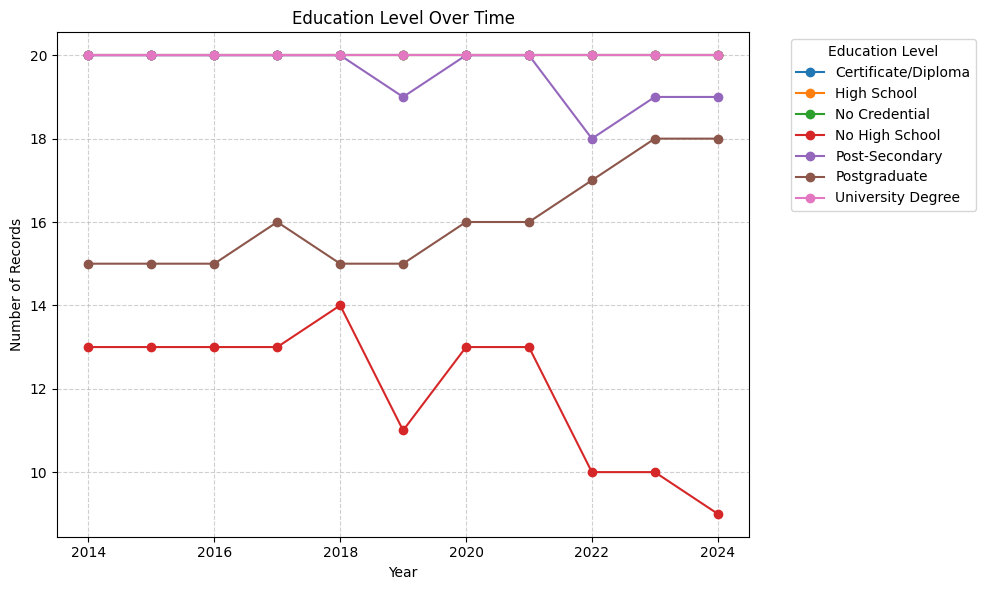

In [81]:
# Reset the index to get 'education' as a column
pivot_counts_reset = pivot_counts.reset_index()

# Melt (reshape) the data from wide to long format
pivot_long = pivot_counts_reset.melt(
    id_vars='education', 
    var_name='year', 
    value_name='count'
)

# Convert year to numeric (for sorting)
pivot_long['year'] = pd.to_numeric(pivot_long['year'], errors='coerce')

# Plot the line chart
plt.figure(figsize=(10,6))
for edu, group in pivot_long.groupby('education'):
    plt.plot(group['year'], group['count'], marker='o', label=edu)

plt.title('Education Level Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


`education vs employment_rate`

In [82]:
# ensure numeric just in case
labour_force_df['employment_rate'] = pd.to_numeric(labour_force_df['employment_rate'], errors='coerce')

education_pivot_mean = labour_force_df.pivot_table(
    index='education',
    columns='year',
    values='employment_rate',   # <-- tell Pandas which numeric to average
    aggfunc='mean',
    fill_value=np.nan
)
display(education_pivot_mean)


year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
education,,,,,,,,,,,
Certificate/Diploma,69.210000,68.625000,67.555000,66.910000,67.095000,67.350000,62.925000,64.620000,65.225000,65.465000,65.175000
High School,71.965000,71.470000,70.220000,69.565000,69.630000,69.695000,64.945000,66.670000,67.505000,67.665000,67.165000
No Credential,33.760000,33.830000,32.770000,32.740000,33.415000,33.180000,29.965000,31.775000,33.090000,32.295000,30.330000
No High School,46.576923,48.115385,46.069231,46.315385,45.671429,47.736364,43.607692,43.061538,39.700000,43.790000,44.411111
Post-Secondary,62.830000,63.515000,61.780000,62.235000,61.000000,62.705263,55.265000,59.245000,61.927778,61.642105,60.136842
Postgraduate,73.680000,74.846667,73.606667,74.050000,73.780000,74.400000,72.693750,74.543750,75.064706,74.372222,74.155556
University Degree,75.030000,74.800000,74.430000,74.600000,74.155000,73.915000,71.690000,73.080000,74.240000,74.035000,73.760000


`plot the grapgh by latest year`

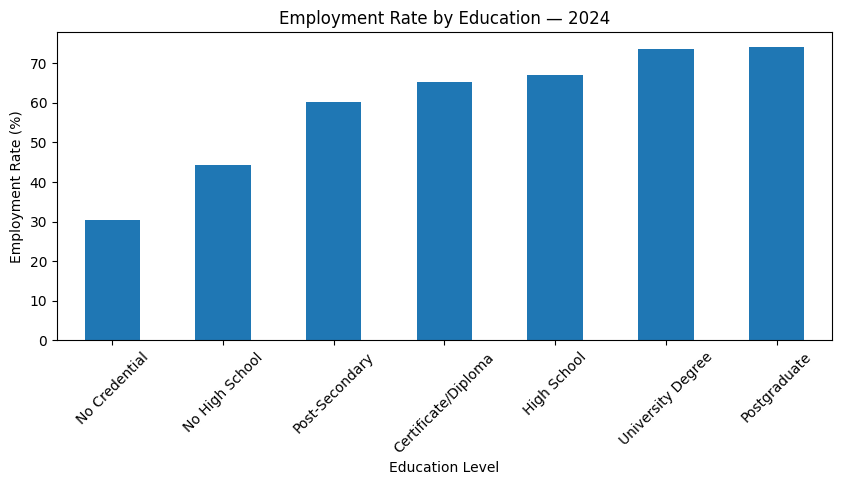

In [83]:
# Plot: Employment rate by education (latest year)
latest = education_pivot_mean.columns.max()
ax = education_pivot_mean[latest].sort_values().plot(
    kind='bar', legend=False, figsize=(10,4), rot=45, title=f'Employment Rate by Education — {latest}'
)
plt.ylabel('Employment Rate (%)')
plt.xlabel('Education Level')
plt.show()

`Trend over time by education`

In [90]:
# Reset the index to get 'education' as a column
education_pivot = education_pivot_mean.reset_index()

# Melt (reshape) the data from wide to long format
edu_pivot_long = education_pivot.melt(
    id_vars='education', 
    var_name='year', 
    value_name='mean'
)

display(edu_pivot_long)

# Convert year to numeric (for sorting)
edu_pivot_long['year'] = pd.to_numeric(edu_pivot_long['year'], errors='coerce')

,education,year,mean
0,Certificate/Diploma,2014,69.210000
1,High School,2014,71.965000
2,No Credential,2014,33.760000
3,No High School,2014,46.576923
4,Post-Secondary,2014,62.830000
...,...,...,...
72,No Credential,2024,30.330000
73,No High School,2024,44.411111
74,Post-Secondary,2024,60.136842
75,Postgraduate,2024,74.155556


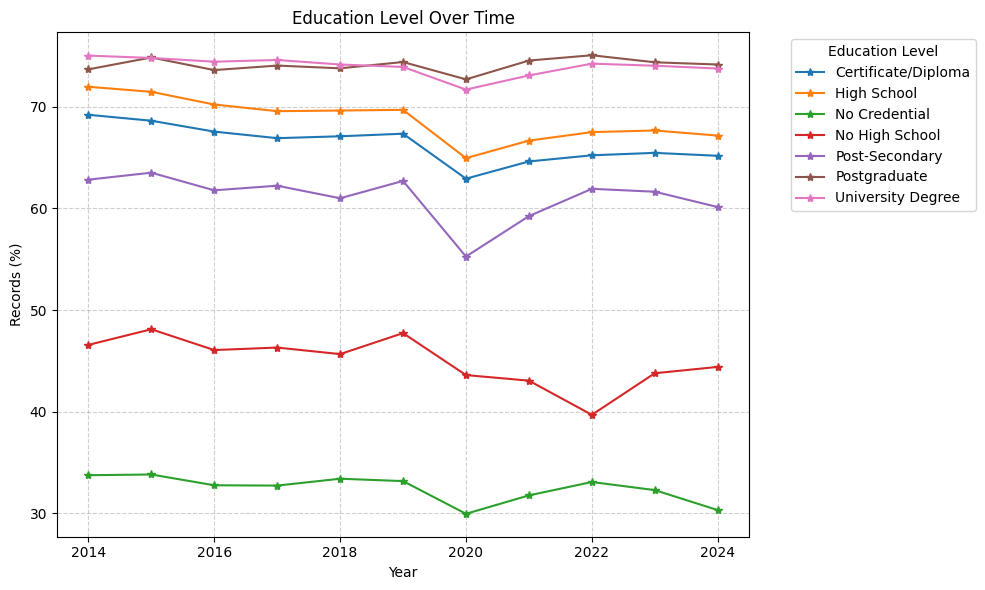

In [91]:
# Plot the line chart
plt.figure(figsize=(10,6))
for edu, group in edu_pivot_long.groupby('education'):
    plt.plot(group['year'], group['mean'], marker='*', label=edu)

plt.title('Education Level Over Time')
plt.xlabel('Year')
plt.ylabel('Records (%)')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [92]:
# Ensure numeric
for col in ['employment_rate','unemployment_rate','participation_rate']:
    labour_force_df[col] = pd.to_numeric(labour_force_df[col], errors='coerce')

# Sanity check: employment + unemployment <= participation (approx)
viol = labour_force_df[(labour_force_df['employment_rate'] + labour_force_df['unemployment_rate']) > (labour_force_df['participation_rate'] + 2)]

# remove blanks
labour_force_df = labour_force_df.dropna()

print(f"Sanity violations: {len(viol)} rows")
labour_force_df.head()


Sanity violations: 826 rows


,year,geo,gender,age_group,education,employment_rate,unemployment_rate,participation_rate
0,2014,Alberta,Men,15 years and over,Postgraduate,83.1,3.0,85.7
1,2014,Alberta,Women,15 years and over,Postgraduate,77.2,4.8,81.1
2,2014,British Columbia,Men,15 years and over,Postgraduate,73.1,4.0,76.2
3,2014,British Columbia,Women,15 years and over,Postgraduate,70.0,5.2,73.7
4,2014,Manitoba,Men,15 years and over,Postgraduate,73.7,2.7,75.7


#### Correlation Analysis

In [93]:
labour_force_df.columns

print(labour_force_df['education'].unique())

['Postgraduate' 'Post-Secondary' 'No Credential' 'Certificate/Diploma'
 'University Degree' 'High School' 'No High School']


In [95]:
# Correlation analysis
# We'll compute Pearson correlation between an ordinal encoding of education and employment rate.
# Map education to an ordered scale
order = ['No Credential',
         'No High School',
         'High School',
         'Post-Secondary',
         'Certificate/Diploma',
         'University Degree',
         'Postgraduate',
]


edu_to_ord = {e:i for i,e in enumerate(order, start=1)}
print(edu_to_ord)

labour_force_df['education_ord'] = labour_force_df['education'].map(edu_to_ord)

corr_by_year = labour_force_df.groupby('year')[['education_ord','employment_rate']].corr().unstack().iloc[:,1]

corr_by_year.name = 'corr_edu_employment'
display(corr_by_year)

{'No Credential': 1, 'No High School': 2, 'High School': 3, 'Post-Secondary': 4, 'Certificate/Diploma': 5, 'University Degree': 6, 'Postgraduate': 7}


year
2014    0.778917
2015    0.792937
2016    0.802673
2017    0.803119
2018    0.797534
2019    0.801796
2020    0.829287
2021    0.836487
2022    0.834954
2023    0.826594
2024    0.826124
Name: corr_edu_employment, dtype: float64

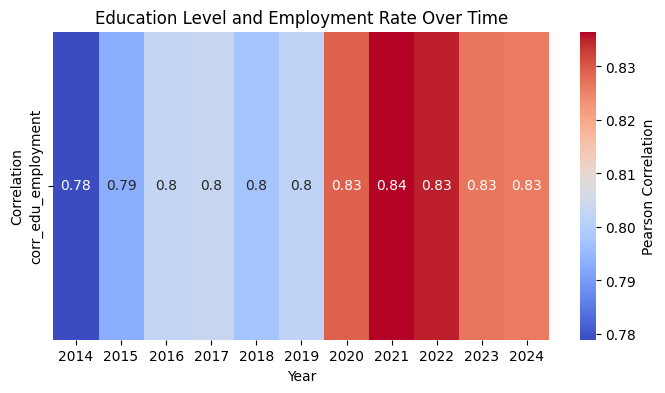

In [96]:
# create a heatmap to visualize the correlation over time
plt.figure(figsize=(8,4))
sns.heatmap(corr_by_year.to_frame().T, annot=True, cmap='coolwarm', cbar_kws={'label': 'Pearson Correlation'})

plt.title('Education Level and Employment Rate Over Time')
plt.ylabel('Correlation')
plt.xlabel('Year')
plt.show()

Overall Pearson correlation (education vs employment rate): 0.809


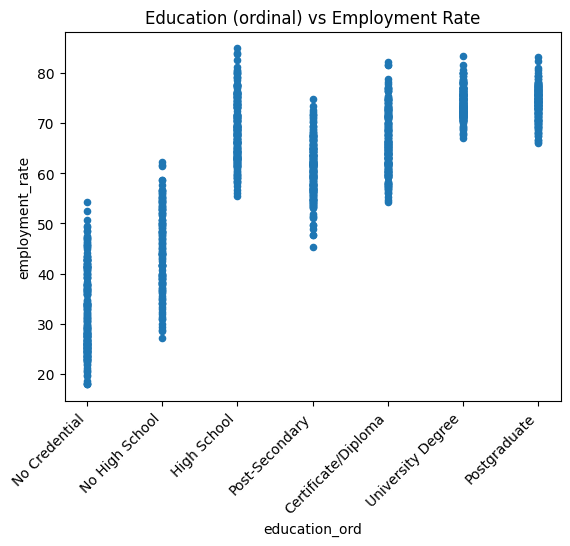

In [97]:
# Overall correlation
overall_corr = labour_force_df[['education_ord','employment_rate']].corr().iloc[0,1]
print('Overall Pearson correlation (education vs employment rate):', round(overall_corr,3))

# Scatter (ordinal education vs employment rate)
# orders the education levels mapped in order from 1-5
labour_force_df.plot.scatter(x='education_ord', y='employment_rate', title='Education (ordinal) vs Employment Rate')
plt.xticks(list(edu_to_ord.values()), list(edu_to_ord.keys()), rotation=45, ha='right')
plt.show()

🔍 Key Findings

1. Education and Employment Correlation

A strong positive relationship was observed between education level and employment rate (~0.809).

Individuals with post-secondary or university degrees consistently exhibited higher employment rates and lower unemployment rates than those without formal education credentials.

Conversely, individuals with no certificate or diploma experienced the lowest employment participation, indicating the critical influence of education on labour force inclusion.

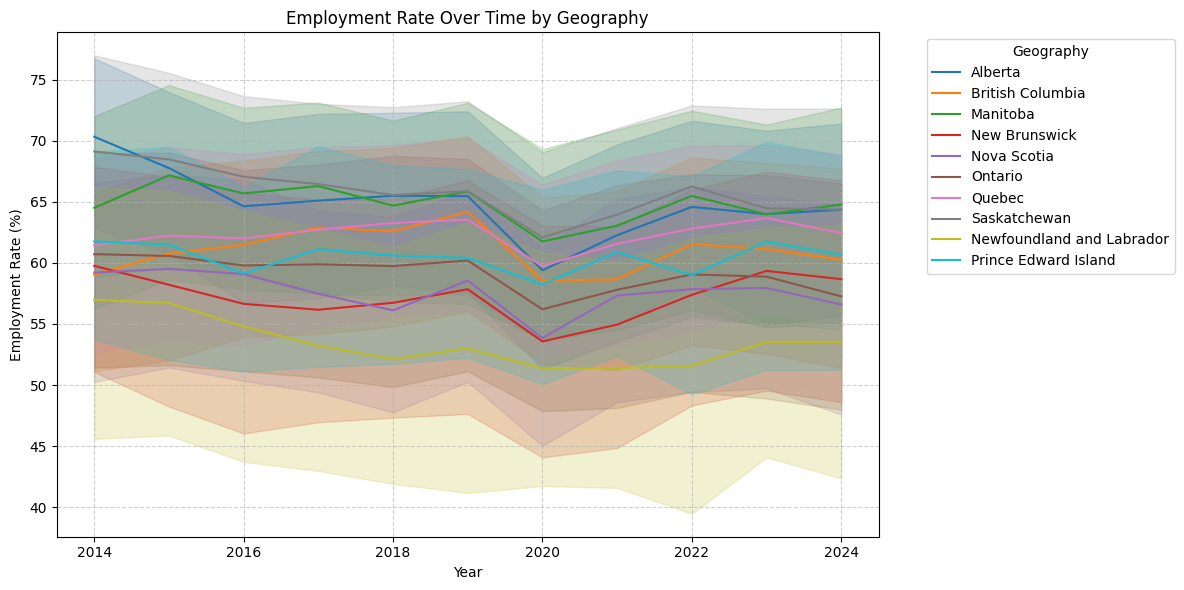

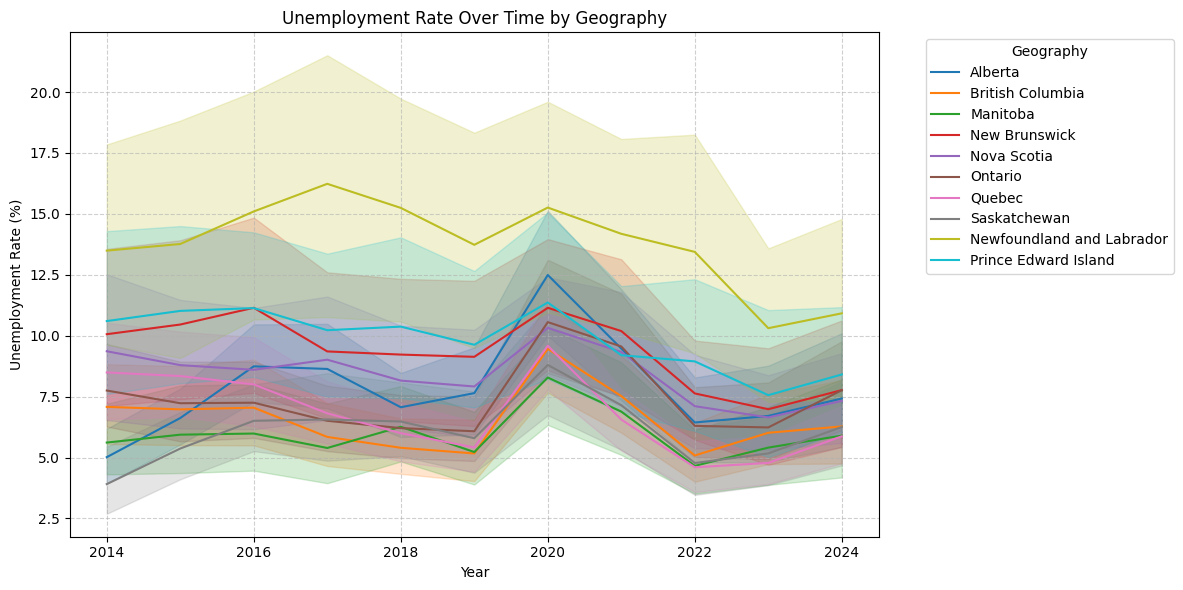

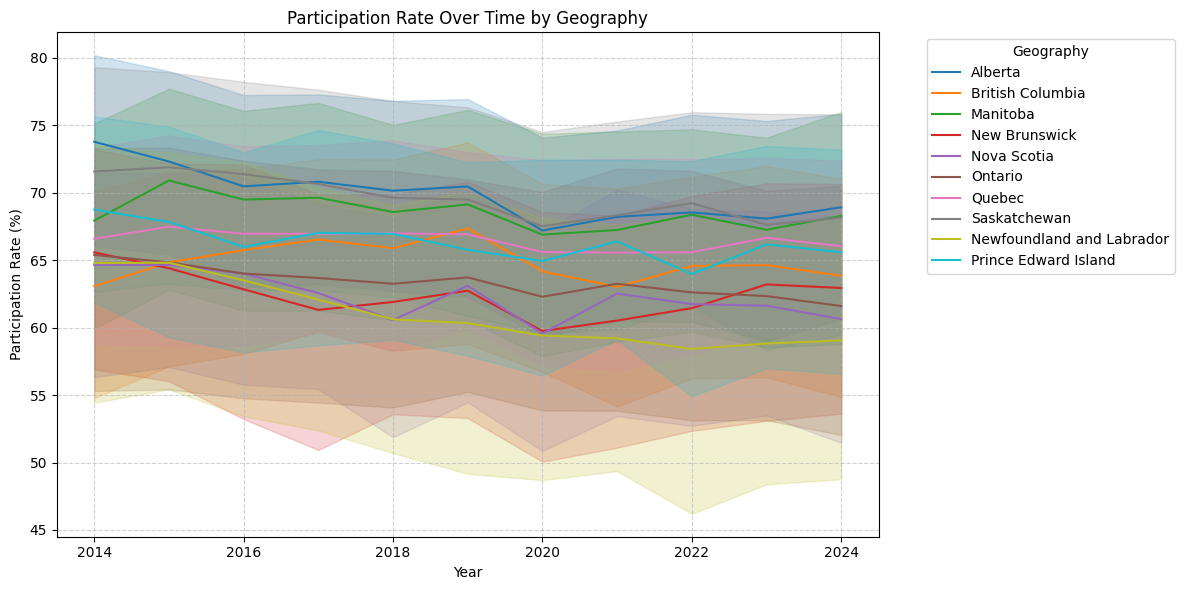

In [104]:
# i want to visualize trends across years for the employment rate, unemployment rate, participation rate by geo
for rate_col in ['employment_rate', 'unemployment_rate', 'participation_rate']:
    plt.figure(figsize=(12,6))
    sns.lineplot(
        data=labour_force_df,
        x='year',
        y=rate_col,
        hue='geo',
        estimator='mean'
    )
    plt.title(f'{rate_col.replace("_", " ").title()} Over Time by Geography')
    plt.ylabel(f'{rate_col.replace("_", " ").title()} (%)')
    plt.xlabel('Year')
    plt.legend(title='Geography', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()



In [109]:
# a table theat groups the above in the diffrent years

employment_grouped_geo = labour_force_df.groupby(['geo', 'year'])['employment_rate'].mean().unstack().reset_index()
unemployment_grouped_geo = labour_force_df.groupby(['geo', 'year'])['unemployment_rate'].mean().unstack().reset_index()
participation_grouped_geo = labour_force_df.groupby(['geo', 'year'])['participation_rate'].mean().unstack().reset_index()

display("The employment rate by geography and year:")
display(employment_grouped_geo)
display("The unemployment rate by geography and year:")
display(unemployment_grouped_geo)
display("The participation rate by geography and year:")
display(participation_grouped_geo)

'The employment rate by geography and year:'

year,geo,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Alberta,70.323077,67.757143,64.628571,65.092857,65.492857,65.464286,59.392857,62.264286,64.584615,63.992308,64.353846
1,British Columbia,59.028571,60.753846,61.476923,62.892308,62.584615,64.175000,58.546154,58.650000,61.530769,61.123077,60.261538
2,Manitoba,64.507143,67.161538,65.684615,66.284615,64.684615,65.858333,61.753846,63.046154,65.483333,63.976923,64.775000
3,New Brunswick,59.753846,58.208333,56.645455,56.163636,56.733333,57.841667,53.572727,54.945455,57.384615,59.341667,58.666667
4,Newfoundland and Labrador,56.972727,56.718182,54.800000,53.225000,52.118182,53.000000,51.366667,51.390909,51.570000,53.525000,53.536364
5,Nova Scotia,59.207692,59.500000,59.084615,57.476923,56.114286,58.553846,53.850000,57.330769,57.846154,57.946154,56.592308
6,Ontario,60.714286,60.564286,59.785714,59.885714,59.735714,60.192857,56.200000,57.800000,59.057143,58.871429,57.257143
7,Prince Edward Island,61.754545,61.490909,59.125000,61.116667,60.609091,60.400000,58.236364,60.883333,59.000000,61.740000,60.663636
8,Quebec,61.435714,62.228571,62.007143,62.714286,63.264286,63.542857,59.735714,61.557143,62.800000,63.671429,62.435714
9,Saskatchewan,69.118182,68.469231,67.046154,66.446154,65.553846,65.876923,62.084615,63.946154,66.250000,64.469231,64.369231


'The unemployment rate by geography and year:'

year,geo,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Alberta,5.015385,6.621429,8.742857,8.635714,7.064286,7.642857,12.492857,9.471429,6.438462,6.707692,7.423077
1,British Columbia,7.078571,6.976923,7.046154,5.846154,5.400000,5.166667,9.461538,7.521429,5.084615,6.015385,6.276923
2,Manitoba,5.614286,5.938462,5.984615,5.392308,6.261538,5.225000,8.284615,6.884615,4.658333,5.407692,5.900000
3,New Brunswick,10.061538,10.458333,11.145455,9.354545,9.225000,9.133333,11.145455,10.190909,7.630769,6.983333,7.766667
4,Newfoundland and Labrador,13.490909,13.763636,15.100000,16.233333,15.245455,13.730000,15.258333,14.181818,13.440000,10.308333,10.918182
5,Nova Scotia,9.361538,8.792308,8.600000,9.015385,8.157143,7.915385,10.321429,9.330769,7.107692,6.646154,7.323077
6,Ontario,7.750000,7.228571,7.250000,6.507143,6.207143,6.078571,10.557143,9.557143,6.300000,6.235714,7.764286
7,Prince Edward Island,10.600000,11.018182,11.133333,10.225000,10.372727,9.627273,11.363636,9.200000,8.945455,7.560000,8.409091
8,Quebec,8.492857,8.342857,8.000000,6.814286,6.000000,5.414286,9.585714,6.557143,4.600000,4.778571,5.871429
9,Saskatchewan,3.909091,5.369231,6.507692,6.561538,6.476923,5.792308,8.800000,7.146154,4.775000,5.169231,6.253846


'The participation rate by geography and year:'

year,geo,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Alberta,73.784615,72.321429,70.478571,70.821429,70.157143,70.471429,67.207143,68.221429,68.546154,68.084615,68.930769
1,British Columbia,63.078571,64.846154,65.746154,66.538462,65.892308,67.358333,64.176923,63.028571,64.576923,64.638462,63.853846
2,Manitoba,67.935714,70.915385,69.500000,69.638462,68.576923,69.141667,66.900000,67.246154,68.375000,67.261538,68.291667
3,New Brunswick,65.584615,64.408333,62.845455,61.318182,61.908333,62.741667,59.754545,60.527273,61.446154,63.208333,62.941667
4,Newfoundland and Labrador,64.790909,64.818182,63.509091,62.083333,60.618182,60.340000,59.416667,59.209091,58.420000,58.825000,59.054545
5,Nova Scotia,64.653846,64.653846,64.015385,62.569231,60.564286,63.107692,59.571429,62.530769,61.746154,61.630769,60.638462
6,Ontario,65.392857,64.842857,64.014286,63.685714,63.257143,63.728571,62.292857,63.257143,62.614286,62.342857,61.607143
7,Prince Edward Island,68.754545,67.845455,65.991667,67.033333,66.954545,65.772727,64.945455,66.400000,63.972727,66.180000,65.590909
8,Quebec,66.592857,67.485714,66.971429,66.957143,67.000000,66.921429,65.614286,65.564286,65.600000,66.664286,66.042857
9,Saskatchewan,71.581818,71.892308,71.384615,70.653846,69.630769,69.500000,67.523077,68.338462,69.233333,67.623077,68.161538


🔍 Key Findings

2. Trends Across Years and Regions

Employment rates were generally stable over time, but minor fluctuations corresponded to broader economic cycles.

Provinces with more diversified economies, such as Ontario, Alberta, and British Columbia, demonstrated higher overall participation rates.

Atlantic provinces exhibited lower employment levels, reflecting regional disparities tied to industrial composition.

In [110]:
# gender and labour force participation rate
gender_By_participation = labour_force_df.groupby(['gender', 'year'])['participation_rate'].mean().unstack().reset_index()
display("The participation rate by gender and year:")
display(gender_By_participation)

'The participation rate by gender and year:'

year,gender,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Men,70.438806,70.031343,69.261765,68.70000,68.486567,68.696923,66.625758,67.131343,66.720313,67.104545,67.192537
1,Women,63.463934,64.675410,63.515000,63.52459,62.332258,63.201667,60.869841,61.816129,62.232787,62.024590,61.554237


<Axes: xlabel='year', ylabel='participation_rate'>

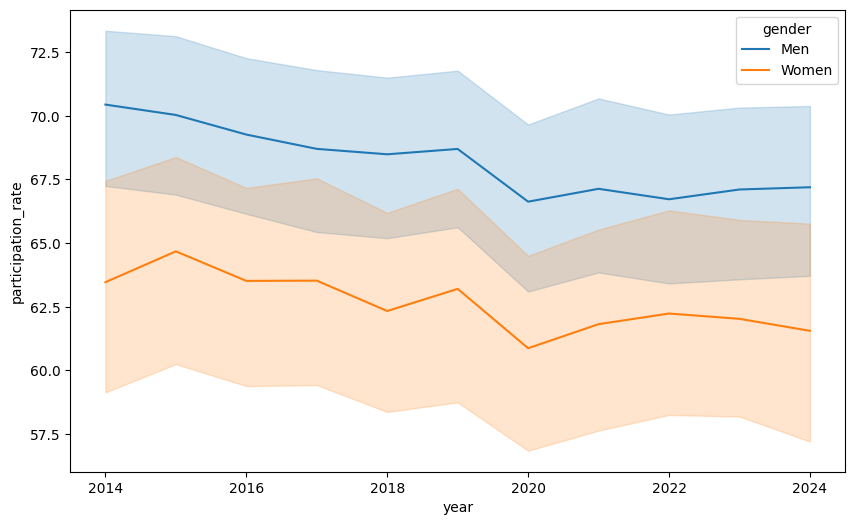

In [111]:
# visualize it in a grappgh
plt.figure(figsize=(10,6))
sns.lineplot(
    data=labour_force_df,
    x='year',
    y='participation_rate',
    hue='gender',
    estimator='mean'    
)  


🔍 Key Findings

3. Gender and Labour Force Participation

Across all education levels, men had slightly higher participation rates, while women had stronger representation in higher education categories over time.

The gender gap in employment narrowed among those with university or college education, underscoring education’s equalizing impact.

In [121]:
gender_pivot_count = labour_force_df.pivot_table(
    index='education',
    columns='year',
    values='gender',   # <-- tell Pandas which numeric to average
    aggfunc='count',
    fill_value=np.nan
)
display(gender_pivot_count)


year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
education,,,,,,,,,,,
Certificate/Diploma,20,20,20,20,20,20,20,20,20,20,20
High School,20,20,20,20,20,20,20,20,20,20,20
No Credential,20,20,20,20,20,20,20,20,20,20,20
No High School,13,13,13,13,14,11,13,13,10,10,9
Post-Secondary,20,20,20,20,20,19,20,20,18,19,19
Postgraduate,15,15,15,16,15,15,16,16,17,18,18
University Degree,20,20,20,20,20,20,20,20,20,20,20


In [100]:
# Export cleaned dataset to CSV + Excel (for Power BI / Excel)
final_cleaned_df = labour_force_df.copy()

clean_csv = "../data/final_labour_force.csv"
final_cleaned_df.to_csv(clean_csv, index=False)

print("Wrote and saved successfully!", clean_csv)


Wrote and saved successfully! ../data/final_labour_force.csv


In [101]:
# Also replace 'cleaned' sheet in the Excel workbook
excel_path = r"../data/labour_force_rates.xlsx"
try:
    from openpyxl import load_workbook
    with pd.ExcelWriter(excel_path, mode='a', engine='openpyxl', if_sheet_exists='replace') as w:
        final_cleaned_df.to_excel(w, index=False, sheet_name='final_cleaned')
except Exception as e:
    print("openpyxl not available, skipping Excel append:", e)


print("Updated Excel:", excel_path)

Updated Excel: ../data/labour_force_rates.xlsx


## Conclusion

🧩 Analytical Insights

The analysis confirms that education remains a primary determinant of employability and labour market stability.
Employment and participation rates rise substantially with each educational milestone, reinforcing policy emphasis on post-secondary access and skills development.

Power BI dashboards built on this dataset can further:

Track year-over-year trends by province and demographic group.

Identify target groups for employment programs.

Monitor progress toward labour inclusion goals aligned with educational advancement.
